In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
data_ = pd.read_csv('/content/gdrive/My Drive/CS5691/assignment-2/datasets/Dataset_1_Team_33.csv')

In [ ]:
data_['Class_label'][data_['Class_label'] == 0] = -1

data_0 = data_[data_['Class_label'] == -1]
data_1 = data_[data_['Class_label'] == 1]

data_0 = data_0.values
data_1 = data_1.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_train, data_test = train_test_split(data_, test_size = 0.25)

In [ ]:
data_train = data_train.values
data_test = data_test.values

In [ ]:
x_train = data_train[:, 0:2]
y_train = data_train[:, 2]

x_test = data_test[:, 0:2]
y_test = data_test[:, 2]

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# SECTION: KERNEL PERCEPTRON IMPLEMENTATION

In [ ]:
def perceptron(x_perc, y_perc, mode):
  C = 2
  degree = 3
  alphas = np.zeros((x_perc.shape[0], 1))
  if mode == 1:
    kerMat = line_kernel(x_perc, x_perc)
  elif mode == 2:
    kerMat = poly_kernel(x_perc, x_perc, C, degree)
  for i in range(x_perc.shape[0]):
    kernel = kerMat[:, i]
    kernel = kernel.reshape(-1, 1)
    w = y_perc * alphas
    y_pred = w.T @ kernel
    if y_pred >= 0:
      y_pred = 1
    elif y_pred < 0:
      y_pred = -1
    if y_pred != y_perc[i]:
        alphas[i] += 1
  w_star = y_perc * alphas
  norm_w = np.linalg.norm(w_star.T)
  rho = np.inf
  for i in range(x_perc.shape[0]):
    kernel = kerMat[:, i]
    kernel = kernel.reshape(-1, 1)
    y_star = w_star.T @ kernel
    val = (y_perc[i] * y_star) / norm_w
    if val < rho:
      rho = val

  return alphas, mode, C, degree, rho

In [ ]:
def line_kernel(x_perc, x_eval):
  linKer = np.zeros((x_perc.shape[0], x_eval.shape[0]))
  for i in range(x_perc.shape[0]):
    for j in range(x_eval.shape[0]):
      linKer[i, j] += x_perc[i].T @ x_eval[j]
  return linKer

In [ ]:
def poly_kernel(x_perc, x_eval, C, degree):
  polKer = np.zeros((x_perc.shape[0], x_eval.shape[0]))
  for i in range(x_perc.shape[0]):
    for j in range(x_eval.shape[0]):
      polKer[i, j] += (x_perc[i].T @ x_eval[j] + C)**degree
  return polKer

In [ ]:
def pred_perceptron(x_perc, w_perc, x_eval, mode, C, degree):
  y_predict = np.zeros((x_eval.shape[0], 1))
  if mode == 1:
    kerMat = line_kernel(x_perc, x_eval)
  elif mode == 2:
    kerMat = poly_kernel(x_perc, x_eval, C, degree)
  for i in range(x_eval.shape[0]):
    kernel = kerMat[:, i]
    kernel = kernel.reshape(-1, 1)
    y_predict[i] = w_perc.T @ kernel
    if y_predict[i] >= 0:
      y_predict[i] = 1
    elif y_predict[i] < 0:
      y_predict[i] = -1
  
  return y_predict

In [ ]:
def scorePred(y_pred, y_eval):
  count = 0
  decount = 0
  for i in range(y_eval.shape[0]):
    if y_pred[i] == y_eval[i]:
      count += 1
    elif y_pred[i] != y_eval[i]:
      decount += 1
  print(count, decount)
  accuracy = count / y_eval.shape[0]
  incorrect = decount / y_eval.shape[0]

  return accuracy, incorrect

In [ ]:
R = 0
for i in range(x_train.shape[0]):
  val = np.linalg.norm(x_train[i])
  if val > R:
    R = val
R

755.4863176486025

In [ ]:
# LINEAR KERNEL

In [ ]:
alphas_pred_lin, mode_pred_lin, C_pred_lin, degree_pred_lin, rho_pred_lin = perceptron(x_train, y_train, 1)
w_pred_lin = y_train * alphas_pred_lin

In [ ]:
y_trainpred_lin = pred_perceptron(x_train, w_pred_lin, x_train, mode_pred_lin, C_pred_lin, degree_pred_lin)
y_pred_lin = pred_perceptron(x_train, w_pred_lin, x_test, mode_pred_lin, C_pred_lin, degree_pred_lin)

In [ ]:
train_accu_lin, train_incorr_lin = scorePred(y_trainpred_lin, y_train) 
test_accu_lin, test_incorr_lin = scorePred(y_pred_lin, y_test)

750 0
250 0


In [ ]:
print('Train accu:', train_accu_lin)
print('Train incorr:', train_incorr_lin)
print('Test accu:', test_accu_lin)
print('Test incorr:', test_incorr_lin)

Train accu: 1.0
Train incorr: 0.0
Test accu: 1.0
Test incorr: 0.0


In [ ]:
ConMat = np.zeros((3,3))

In [ ]:
for i in range(y_pred_lin.shape[0]):
  ConMat[int(y_pred_lin[i])+1, int(y_test[i])+1] += 1

In [ ]:
print('Confusion Matrix, Linear Kernel: \n', ConMat)

Confusion Matrix, Linear Kernel: 
 [[134.   0.   0.]
 [  0.   0.   0.]
 [  0.   0. 116.]]


In [ ]:
updates = 0
iter_updates_lin = [0]
for alpha in alphas_pred_lin:
  updates += alpha[0]
  iter_updates_lin.append(updates)

print('Iterations required to reach max accuracy: ', iter_updates_lin[-1])

Iterations required to reach max accuracy:  1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

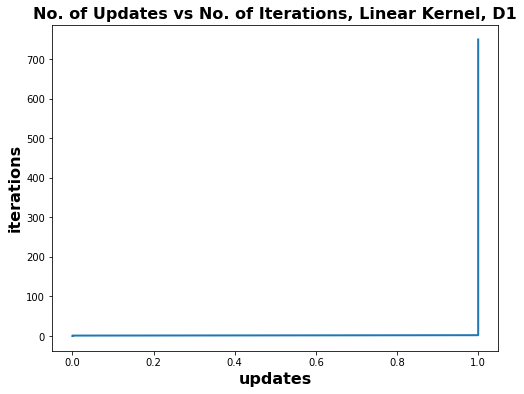

In [ ]:
epochs = np.arange(0, x_train.shape[0]+1)

plt.figure(figsize=[8, 6])
plt.plot(iter_updates_lin, epochs, linewidth = 2)
plt.ylabel('iterations', fontweight='bold', fontsize=16)
plt.xlabel('updates', fontweight='bold', fontsize=16)
plt.title('No. of Updates vs No. of Iterations, Linear Kernel, D1', fontweight='bold', fontsize=16)
plt.savefig("partC1_updates_vs_iterations_lin_d1.png")
files.download("partC1_updates_vs_iterations_lin_d1.png")

In [ ]:
bound_lin = (R / rho_pred_lin)**2
bound_lin

array([[3.60495845e-05]])

In [ ]:
# LINEAR KERNEL SVM USING INBUILT FUNCTION (HARD MARGIN)

In [ ]:
lin_svm = SVC(C = 1000, kernel = 'linear')
lin_svm.fit(x_train, y_train.ravel())

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
lin_svm.score(x_train, y_train)

1.0

In [ ]:
lin_svm.score(x_test, y_test)

1.0

In [ ]:
# POLYNOMIAL KERNEL, CONSTANT = 2, DEGREE = 3

In [ ]:
alphas_pred_pol, mode_pred_pol, C_pred_pol, degree_pred_pol, rho_pred_pol = perceptron(x_train, y_train, 2)
w_pred_pol = y_train * alphas_pred_pol

In [ ]:
y_trainpred_pol = pred_perceptron(x_train, w_pred_pol, x_train, mode_pred_pol, C_pred_pol, degree_pred_pol)
y_pred_pol = pred_perceptron(x_train, w_pred_pol, x_test, mode_pred_pol, C_pred_pol, degree_pred_pol)

In [ ]:
train_accu_pol, train_incorr_pol = scorePred(y_trainpred_pol, y_train)
test_accu_pol, test_incorr_pol = scorePred(y_pred_pol, y_test)

750 0
250 0


In [ ]:
print('Train accu:', train_accu_pol)
print('Train incorr:', train_incorr_pol)
print('Test accu:', test_accu_pol)
print('Test incorr:', test_incorr_pol)

Train accu: 1.0
Train incorr: 0.0
Test accu: 1.0
Test incorr: 0.0


In [ ]:
ConMat2 = np.zeros((3,3))

In [ ]:
for i in range(y_pred_pol.shape[0]):
  ConMat2[int(y_pred_pol[i])+1, int(y_test[i])+1] += 1

In [ ]:
print('Confusion Matrix, Polynomial Kernel: \n', ConMat2)

Confusion Matrix, Polynomial Kernel: 
 [[134.   0.   0.]
 [  0.   0.   0.]
 [  0.   0. 116.]]


In [ ]:
updates = 0
iter_updates_pol = [0]
for alpha in alphas_pred_pol:
  updates += alpha[0]
  iter_updates_pol.append(updates)

print('Iterations required to reach max accuracy: ', iter_updates_pol[-1])

Iterations required to reach max accuracy:  1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

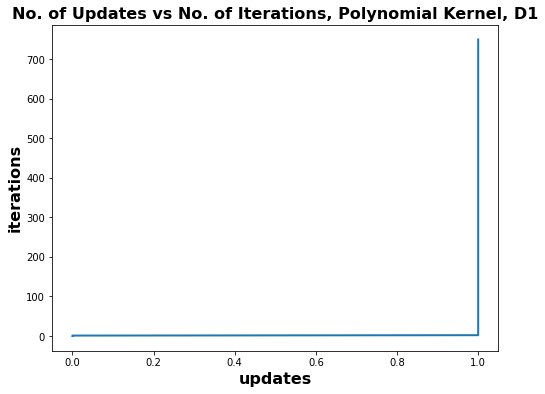

In [ ]:
epochs = np.arange(0, x_train.shape[0]+1)

plt.figure(figsize=[8, 6])
plt.plot(iter_updates_pol, epochs, linewidth = 2)
plt.ylabel('iterations', fontweight='bold', fontsize=16)
plt.xlabel('updates', fontweight='bold', fontsize=16)
plt.title('No. of Updates vs No. of Iterations, Polynomial Kernel, D1', fontweight='bold', fontsize=16)
plt.savefig("partC1_updates_vs_iterations_poly_d1.png")
files.download("partC1_updates_vs_iterations_poly_d1.png")

In [ ]:
bound_pol = (R / rho_pred_pol)**2
bound_pol

array([[1.43798038e-25]])

In [ ]:
# POLYNOMIAL KERNEL SVM USING INBUILT FUNCTION (HARD MARGIN)

In [ ]:
pol_svm = SVC(C = 1000, kernel = 'poly', degree = 3, coef0 = 2)
pol_svm.fit(x_train, y_train.ravel())

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pol_svm.score(x_train, y_train)

1.0

In [ ]:
pol_svm.score(x_test, y_test)

1.0

In [ ]:
X1 = np.linspace(-400, 600, 100) # -400, 600, 100 for dataset 1; -1.25, 1.25, 100 for dataset 3
X2 = np.linspace(-250, 750, 100) # -250, 750, 100 for dataset 1; -1.25, 1.25, 100 for dataset 3
X1, X2 = np.meshgrid(X1, X2)
TempMat = np.zeros((X1.shape[0]**2, 2))
TempMat[:, 0], TempMat[:, 1] = X1.reshape(X1.shape[0]**2), X2.reshape(X2.shape[0]**2)

In [ ]:
DecSurf_lin = pred_perceptron(x_train, w_pred_lin, TempMat, mode_pred_lin, C_pred_lin, degree_pred_lin)

DecSurf_lin = DecSurf_lin.reshape(X1.shape[0], X2.shape[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

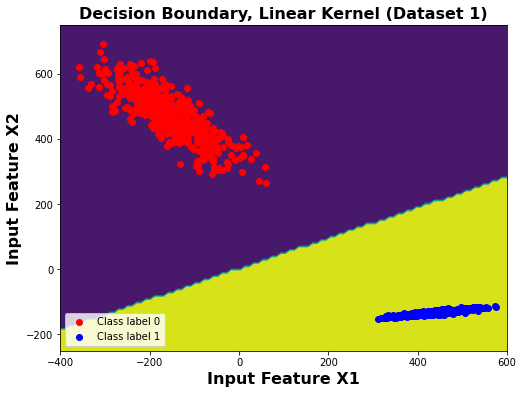

In [ ]:
plt.figure(2, figsize = [8, 6])
plt.contourf(X1, X2, DecSurf_lin)
scatter_0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', label = 'Class label 0')
scatter_1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', label = 'Class label 1')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1], loc = 'lower left')
plt.title('Decision Boundary, Linear Kernel (Dataset 1)', fontweight='bold', fontsize=16)
plt.savefig("partC1_decision_bound_linear.png")
files.download("partC1_decision_bound_linear.png")

In [ ]:
DecSurf_pol = pred_perceptron(x_train, w_pred_pol, TempMat, mode_pred_pol, C_pred_pol, degree_pred_pol)

DecSurf_pol = DecSurf_pol.reshape(X1.shape[0], X2.shape[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

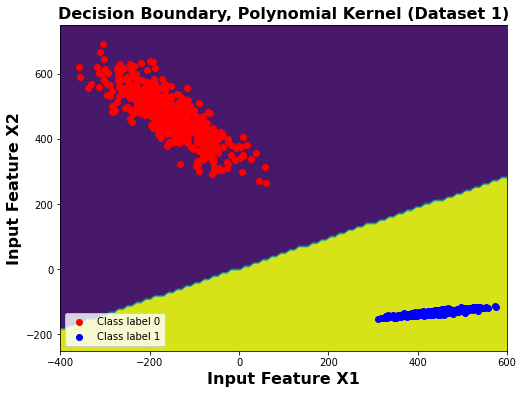

In [ ]:
plt.figure(2, figsize = [8, 6])
plt.contourf(X1, X2, DecSurf_pol)
scatter_0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', label = 'Class label 0')
scatter_1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', label = 'Class label 1')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1], loc = 'lower left')
plt.title('Decision Boundary, Polynomial Kernel (Dataset 1)', fontweight='bold', fontsize=16)
plt.savefig("partC1_decision_bound_poly.png")
files.download("partC1_decision_bound_poly.png")